In [1]:
ls

kb_data/  kb_main.csv  kb_main_analyse.ipynb  kb_main_word2vec.ipynb


In [3]:
ls kb_data/

kb_data.rar            kb_main_dialog.csv          kb_main_index_bak.csv
kb_main.csv            kb_main_import.csv          kb_main_log.csv
kb_main_20180112.csv   kb_main_import_detail.csv   kb_main_question.csv
kb_main_201801121.csv  kb_main_index.csv           kb_tree.csv
kb_main_atta.csv       kb_main_index_20171107.csv


In [152]:
# cd kb_data/
# !cd ..
!pip install Biopython -i https://pypi.douban.com/simple

Looking in indexes: https://pypi.douban.com/simple
     |████████████████████████████████| 2.2MB 2.1MB/s eta 0:00:01


In [13]:
!ls
# !rar x kb_data.rar

kb_data.rar	       kb_main_dialog.csv	   kb_main_index_bak.csv
kb_main.csv	       kb_main_import.csv	   kb_main_log.csv
kb_main_20180112.csv   kb_main_import_detail.csv   kb_main_question.csv
kb_main_201801121.csv  kb_main_index.csv	   kb_tree.csv
kb_main_atta.csv       kb_main_index_20171107.csv


In [139]:
import pandas as pd
import jieba,os,re
from gensim import corpora, models, similarities

In [2]:
root_path='kb_data/'

In [3]:
df_kb_main=pd.read_csv(root_path+'kb_main.csv')#
df_kb_main_20180112=pd.read_csv(root_path+'kb_main_20180112.csv')#
df_kb_main_201801121=pd.read_csv(root_path+'kb_main_201801121.csv')#
# df_kb_main_atta=pd.read_csv(root_path+'kb_main_atta.csv')
# df_kb_main_dialog=pd.read_csv(root_path+'kb_main_dialog.csv')
# df_kb_main_import=pd.read_csv(root_path+'kb_main_import.csv')
df_kb_main_import_detail=pd.read_csv(root_path+'kb_main_import_detail.csv')#ktype不一样

# df_kb_main_index=pd.read_csv(root_path+'kb_main_index.csv')##词语
# df_kb_main_index_20171107=pd.read_csv(root_path+'kb_main_index_20171107.csv')##词语
# df_kb_main_index_bak=pd.read_csv(root_path+'kb_main_index_bak.csv')##词语
# df_kb_main_log=pd.read_csv(root_path+'kb_main_log.csv')
# df_kb_main_question=pd.read_csv(root_path+'kb_main_question.csv')
# df_kb_tree=pd.read_csv(root_path+'kb_tree.csv')

In [4]:
df_all=df_kb_main.append(df_kb_main_20180112)
df_all=df_all.append(df_kb_main_201801121)
df_all=df_all.append(df_kb_main_import_detail)

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [5]:
df_all.sample(20)

,kb_content,kb_index,kb_title,kb_type,kb_type_name
18834,行政检查,",hMDIvn8z,tjd2C1HK,1M4diJwZ",保税物流中心的货物管理是什么事项类型,1001.0,NaN
10370,<span style='font-weight:bold;'>第八届中国-东盟（泰国）商品...,NaN,第八届中国-东盟（泰国）商品贸易展览会,1001.0,NaN
13708,拱北海关监督电话（链接至拱北海关网站）或12360海关服务热线,",YzOuuHqv,pFSTp82u,GjmHl0GT",横琴新区电子账册业务的监督电话是什么,1001.0,NaN
1493,各直属海关咨询电话或12360海关服务热线,NaN,加工贸易企业联网监管业务的咨询电话是什么,NaN,图文知识
13472,<span style='font-weight:bold;'>第八届中国-东盟（泰国）商品...,NaN,第八届中国-东盟（泰国）商品贸易展览会,1001.0,NaN
10415,"<table class=""comp_tb prd_tb"" border=""0"" cells...",NaN,兴业银行-万利宝2018年第1期非保本浮动收益封闭式40009,1001.0,NaN
20946,<p>对应模块： 企业综合信息——药交所。</p><p>访问地址：http://bi.ami...,NaN,如何进行进口药品器械国内物流追踪？,1001.0,NaN
3585,<span style='font-weight:bold;'>第三十一届中国（广州）国际家...,NaN,第三十一届中国（广州）国际家具博览会 - 办公环境展,1001.0,NaN
12928,<span style='font-weight:bold;'>第二届中国品牌商品非洲展</...,NaN,第二届中国品牌商品非洲展,1001.0,NaN
18035,"<div class=""blkContainerPblk"">&#13;\n ...",NaN,邮储银行-云南：悦享分期，感恩有您,1001.0,NaN


In [7]:
df_all=df_all.loc[((df_all['kb_type']==1001)|(df_all['kb_type_name']=='图文知识')),['kb_title','kb_content']]

In [8]:
df_all.shape

(30535, 2)

In [11]:
df_all=df_all.drop_duplicates()

In [12]:
df_all.shape

(9747, 2)

In [13]:
df_all.sample(30)

,kb_title,kb_content
12858,建设银行-乾元鑫溢江南非保本型2018年第828期,"<table class=""comp_tb prd_tb"" border=""0"" cells..."
16647,减免税备案业务的收费标准是什么,此业务不需要收费
21707,交通银行-带你“易”起购 ！苏宁新客满额减,"<div class=""blkContainerPblk"">&#13;\n ..."
1651,加工贸易企业联网监管的审查标准是什么,（一）联网监管资格：<br>\n接收企业申请后，海关主要针对以下内容进行审查评估： <br>...
10033,宁波银行-汇通理财2017年惠添利2678号产品宁波专属,"<table class=""comp_tb prd_tb"" border=""0"" cells..."
21575,中国银行-中银稳富ZYWF-GDZH17132,"<table class=""comp_tb prd_tb"" border=""0"" cells..."
1812,华夏银行-增盈1949号161天B款,"<table class=""comp_tb prd_tb"" border=""0"" cells..."
16111,光大银行-【10元惠生活】一起逛逛,"<div class=""blkContainerPblk"">&#13;\n ..."
162,出口监管仓库延期的申请材料是什么,（一）《出口监管仓库申请书》（见附件）、《出口监管仓库设立申请事项表》（见附件）；<br>\...
6440,2017 美国拉斯维加斯国际服装及面辅料展,2017 美国拉斯维加斯国际服装及面辅料展<br/>举办地点：拉斯维加斯会议展览中心<br/...


In [58]:
def not_empty(s):
    return s and s.strip()
def clean_content(x):
    str_cut=' '.join(re.findall('[\u4e00-\u9fa5]+',str(x)))
    str_cut=jieba.lcut(str_cut)
    str_cut=list(filter(not_empty, str_cut))
    return str_cut
                                

    

In [59]:
df_all['kb_content_clean']=df_all['kb_content'].map(clean_content)

In [60]:
df_all.sample(10)

,kb_title,kb_content,kb_content_clean
10908,中国银行-中银汇增A计划2018年第26期,"<table class=""comp_tb prd_tb"" border=""0"" cells...","[产品名称, 中银, 汇增, 计划, 年, 第, 期, 同类产品, 对比, 同类产品, 对比..."
21937,华夏银行-增盈2036号162天C款,"<table class=""comp_tb prd_tb"" border=""0"" cells...","[产品名称, 增盈, 号, 天, 款, 同类产品, 对比, 同类产品, 对比, 所属, 银行..."
3562,海关监管货物仓储审批是什么事项类型,行政许可,[行政许可]
2530,交通银行-甜蜜交通银行 MCAKE免费升磅,"<div class=""blkContainerPblk"">&#13;\n ...","[新浪, 财经, 信用卡, 优惠活动, 正文, 甜蜜, 交通银行, 免费, 升磅, 年, 月..."
12099,跨境电子商务业务办理的办理时间是什么,各直属海关业务现场（链接至各直属海关网站）或拨打12361海关服务热线,"[各直属, 海关, 业务, 现场, 链接, 至, 各直属, 海关, 网站, 或, 拨打, 海..."
2718,民生银行-非凡资产管理翠竹1W理财产品周一对公款特159期,"<table class=""comp_tb prd_tb"" border=""0"" cells...","[产品名称, 非凡, 资产, 管理, 翠竹, 理财产品, 周一, 对, 公款, 特, 期, ..."
11954,过境货物管理业务的监督电话是什么,各直属海关咨询电话或12361海关服务热线,"[各直属, 海关, 咨询电话, 或, 海关, 服务, 热线]"
15619,招商银行-高净值专享金葵花增利系列1202150号北京分行销售,"<table class=""comp_tb prd_tb"" border=""0"" cells...","[产品名称, 高, 净值, 专享, 金葵花, 增利, 系列, 号, 北京分行, 销售, 同类..."
684,出口监管仓库注销的实施机构是什么,海关总署加贸司、各直属海关负责出口监管仓库业务的部门,"[海关总署, 加贸司, 各直属, 海关, 负责, 出口, 监管, 仓库, 业务, 的, 部门]"
2010,平安银行-安财富双周利现金管理类2012年2期滚动型,"<table class=""comp_tb prd_tb"" border=""0"" cells...","[产品名称, 安, 财富, 双周, 利, 现金管理, 类, 年, 期, 滚动, 型, 同类产..."


In [29]:
import re
p='''<p>表头的筛选菜单项object[]-fixed列是否固定，可选 <code>true</code>(等效于 left) <code>'left''right'</code>boolean|stringfalsekeyReact 需要的 key，如果已经设置了唯一的 <code>dataIndex</code>，可以忽略这个属性string-render生成复杂数据的渲染函数，参数分别为当前行的值，当前行数据，行索引，@return里面可以设置表格<a href="https://ant.design/components/table-cn/#components-table-demo-colspan-rowspan" title="行/列合并" target="">行/列合并</a>Function(text, record, index) {}-sorter排序函数，本地排序使用一个函数(参考 <a href="https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Global_Objects/Array/sort" title="Array.sort" target="">Array.sort</a> 的 compareFunction)，需要服务端排序可设为 trueFunction|boolean-sortOrder排序的受控属性，外界可用此控制列的&nbsp;</p>'''
m=' '.join(re.findall('[\u4e00-\u9fa5]+',p))


In [30]:
m

'表头的筛选菜单项 列是否固定 可选 等效于 需要的 如果已经设置了唯一的 可以忽略这个属性 生成复杂数据的渲染函数 参数分别为当前行的值 当前行数据 行索引 里面可以设置表格 行 列合并 行 列合并 排序函数 本地排序使用一个函数 参考 的 需要服务端排序可设为 排序的受控属性 外界可用此控制列的'

In [51]:
def not_empty(s):
    return s and s.strip()

In [52]:
str_cut=jieba.lcut('产品名称 汇通理财 年惠添利 号产品 同类产品对比 同类产品对比 ')

In [53]:

str_cut=list(filter(not_empty, str_cut))


In [54]:
str_cut

['产品名称', '汇通', '理财', '年惠', '添利', '号', '产品', '同类产品', '对比', '同类产品', '对比']

['产品名称', '汇通', '理财', '年惠', '添利', '号', '产品', '同类产品', '对比', '同类产品', '对比']


In [10]:
# !pip install gensim -i https://pypi.douban.com/simple

In [4]:
df['kb_title_split']=df['kb_title'].map(lambda x:jieba.lcut(str(x)))

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.270 seconds.
Prefix dict has been built succesfully.


In [5]:
df.head()

,kb_title,kb_content,kb_title_split
0,跨境电子商务企业注册登记的设定依据是什么,《中华人民共和国海关报关单位注册登记管理规定》<br>\n《海关总署关于公布<中华人民共和国...,"[跨境, 电子商务, 企业, 注册, 登记, 的, 设定, 依据, 是, 什么]"
1,对高层次留学人才回国和海外科技专家来华工作进出境物品业务会办理哪些证件？,无,"[对, 高层次, 留学, 人才, 回国, 和, 海外, 科技, 专家, 来华, 工作, 进出..."
2,2015年土耳其春季国际家庭用品、礼品及家用电器展览会,<span style='font-weight:bold;'>2015年土耳其春季国际家庭...,"[2015, 年, 土耳其, 春季, 国际, 家庭用品, 、, 礼品, 及, 家用电器, 展览会]"
3,交通银行-得利宝沃德添利2111180013,"<table class=""comp_tb prd_tb"" border=""0"" cells...","[交通银行, -, 得利, 宝沃德, 添利, 2111180013]"
4,2014 巴西圣保罗环球资源采购交易会,<span style='font-weight:bold;'>2014 巴西圣保罗环球资源...,"[2014, , 巴西, 圣保罗, 环球, 资源, 采购, 交易会]"


In [61]:
"""准备好训练语料，整理成gensim需要的输入格式"""

train = []
for each in df_all['kb_content_clean']:
    train.append(each)
    # train: [['黄蜂', '湖人', '首发', '科比', '带伤', '战',...],[...],...]

In [141]:
train[:10]

[['中华人民共和国海关',
  '报关',
  '单位',
  '注册',
  '登记',
  '管理',
  '规定',
  '海关总署',
  '关于',
  '公布',
  '中华人民共和国海关',
  '报关',
  '单位',
  '注册',
  '登记',
  '管理',
  '规定',
  '执行',
  '过程',
  '中',
  '涉及',
  '的',
  '法律文书',
  '及',
  '相关',
  '表格',
  '式样',
  '的',
  '公告',
  '海关总署',
  '年',
  '第',
  '号',
  '公告',
  '海关总署',
  '关于',
  '实施',
  '法人',
  '和',
  '企业',
  '组织',
  '统一',
  '社会',
  '信用',
  '代码',
  '有关',
  '事项',
  '的',
  '公告',
  '海关总署',
  '年',
  '第',
  '号',
  '公告',
  '海关总署',
  '关于',
  '跨境',
  '电子商务',
  '零售',
  '进出口',
  '商品',
  '有关',
  '监管',
  '事宜',
  '的',
  '公告',
  '海关总署',
  '年',
  '第',
  '号',
  '公告',
  '海关总署',
  '关于',
  '外商投资',
  '企业',
  '注册',
  '登记',
  '有关',
  '事宜',
  '的',
  '公告',
  '海关总署',
  '年',
  '第',
  '号',
  '公告'],
 ['无'],
 ['年',
  '土耳其',
  '春季',
  '国际',
  '家庭用品',
  '礼品',
  '及',
  '家用电器',
  '展览会',
  '举办',
  '地点',
  '展览',
  '中心',
  '联系人',
  '戚锦照',
  '先生',
  '电话',
  '传真',
  '邮箱',
  '展会',
  '主页',
  '展会',
  '简介',
  '土耳其',
  '国际',
  '家庭用品',
  '和',
  '家用电器',
  '展览会',
  '是',
  '由',
  '土耳其',
  '最大',
  '的',
  '贸易

In [142]:

    
"""构建词频矩阵，训练LDA模型"""
dictionary = corpora.Dictionary(train)
# corpus[0]: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1),...]
# corpus是把每条新闻ID化后的结果，每个元素是新闻中的每个词语，在字典中的ID和频率
corpus = [dictionary.doc2bow(text) for text in train]

lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=100)


2019-07-22 01:45:28,869 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-07-22 01:45:30,518 : INFO : built Dictionary(18028 unique tokens: ['两笔', '充分发挥', '海报', '强大', '防疫']...) from 9747 documents (total 1005863 corpus positions)
2019-07-22 01:45:31,529 : INFO : using symmetric alpha at 0.01
2019-07-22 01:45:31,530 : INFO : using symmetric eta at 0.01
2019-07-22 01:45:31,536 : INFO : using serial LDA version on this node
2019-07-22 01:45:31,942 : INFO : running online (single-pass) LDA training, 100 topics, 1 passes over the supplied corpus of 9747 documents, updating model once every 2000 documents, evaluating perplexity every 9747 documents, iterating 50x with a convergence threshold of 0.001000
2019-07-22 01:45:31,943 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-07-22 01:45:31,945 : INFO : PROGRESS: pass 0, at document #2000/9747
2019-07-22 01:45:45,214 : INFO : merging cha

2019-07-22 01:46:35,413 : INFO : topic #68 (0.010): 0.079*"海关" + 0.069*"船舶" + 0.054*"吨" + 0.053*"部门" + 0.044*"的" + 0.043*"负责" + 0.042*"减免税" + 0.041*"税" + 0.038*"隶属" + 0.035*"各直属"


10个主题的单词分布为：

(66, '0.020*"投资" + 0.017*"晋级" + 0.016*"收益" + 0.013*"起始" + 0.013*"元" + 0.011*"预期" + 0.011*"时间" + 0.010*"对比" + 0.010*"万元" + 0.009*"金额"')
(87, '0.057*"小镇" + 0.022*"文化" + 0.021*"的" + 0.011*"有限公司" + 0.008*"迪士尼" + 0.008*"风味" + 0.008*"活动" + 0.008*"美国" + 0.008*"融合" + 0.006*"或"')
(48, '0.029*"投资" + 0.027*"电子信息" + 0.024*"收益" + 0.023*"起始" + 0.019*"时间" + 0.017*"同类产品" + 0.016*"元" + 0.016*"预期" + 0.015*"万元" + 0.015*"对比"')
(22, '0.052*"客户" + 0.030*"工行" + 0.027*"活动" + 0.022*"的" + 0.015*"信用卡" + 0.014*"在" + 0.014*"月" + 0.012*"分享" + 0.011*"电子" + 0.011*"新"')
(16, '0.029*"的" + 0.019*"反倾销" + 0.014*"排除" + 0.014*"活动" + 0.013*"不符" + 0.013*"到" + 0.011*"年" + 0.010*"为" + 0.009*"首" + 0.008*"本页"')
(1, '0.163*"加工" + 0.130*"贸易" + 0.058*"监管" + 0.057*"补充" + 0.041*"企业" + 0.038*"的" + 0.037*"账册" + 0.029*"申报" + 0.026*"周期" + 0.026*"联网"')
(29, '0.039*"出入境" + 0.031*"标准版" + 0.029*"的" + 0.024*"减券" + 0.019*"使用" + 0.013*"密码" + 0.012*"登录" + 0.011*"月" + 0.011*"活动" + 0.010*"年"')
(91, '0.031*"投资" + 0.025*"收益" + 0.023*"起始

In [143]:
topic_list = lda.print_topics(10)
print("10个主题的单词分布为：\n")
for topic in topic_list:
    print(topic)

2019-07-22 01:47:10,202 : INFO : topic #93 (0.010): 0.071*"检疫" + 0.069*"检验" + 0.059*"的" + 0.035*"报检" + 0.016*"核查" + 0.015*"和" + 0.014*"总局" + 0.014*"了" + 0.013*"监督管理" + 0.013*"信息"
2019-07-22 01:47:10,205 : INFO : topic #85 (0.010): 0.061*"投资" + 0.047*"起始" + 0.046*"收益" + 0.032*"元" + 0.032*"时间" + 0.031*"金额" + 0.031*"同类产品" + 0.031*"对比" + 0.031*"预期" + 0.030*"万元"
2019-07-22 01:47:10,207 : INFO : topic #3 (0.010): 0.037*"的" + 0.018*"症状" + 0.017*"减免" + 0.016*"卫生" + 0.014*"实施细则" + 0.014*"和" + 0.011*"配合" + 0.011*"或" + 0.010*"海关总署" + 0.010*"头痛"
2019-07-22 01:47:10,209 : INFO : topic #6 (0.010): 0.034*"口腔" + 0.029*"元" + 0.023*"信用卡" + 0.016*"工银" + 0.015*"欢乐" + 0.014*"的" + 0.014*"优惠" + 0.013*"持卡人" + 0.012*"检查" + 0.012*"白金卡"
2019-07-22 01:47:10,210 : INFO : topic #1 (0.010): 0.163*"加工" + 0.130*"贸易" + 0.058*"监管" + 0.057*"补充" + 0.041*"企业" + 0.038*"的" + 0.037*"账册" + 0.029*"申报" + 0.026*"周期" + 0.026*"联网"
2019-07-22 01:47:10,212 : INFO : topic #9 (0.010): 0.029*"一季度" + 0.008*"重庆地区" + 0.005*"准" + 0.005*"日" 

10个主题的单词分布为：

(93, '0.071*"检疫" + 0.069*"检验" + 0.059*"的" + 0.035*"报检" + 0.016*"核查" + 0.015*"和" + 0.014*"总局" + 0.014*"了" + 0.013*"监督管理" + 0.013*"信息"')
(85, '0.061*"投资" + 0.047*"起始" + 0.046*"收益" + 0.032*"元" + 0.032*"时间" + 0.031*"金额" + 0.031*"同类产品" + 0.031*"对比" + 0.031*"预期" + 0.030*"万元"')
(3, '0.037*"的" + 0.018*"症状" + 0.017*"减免" + 0.016*"卫生" + 0.014*"实施细则" + 0.014*"和" + 0.011*"配合" + 0.011*"或" + 0.010*"海关总署" + 0.010*"头痛"')
(6, '0.034*"口腔" + 0.029*"元" + 0.023*"信用卡" + 0.016*"工银" + 0.015*"欢乐" + 0.014*"的" + 0.014*"优惠" + 0.013*"持卡人" + 0.012*"检查" + 0.012*"白金卡"')
(1, '0.163*"加工" + 0.130*"贸易" + 0.058*"监管" + 0.057*"补充" + 0.041*"企业" + 0.038*"的" + 0.037*"账册" + 0.029*"申报" + 0.026*"周期" + 0.026*"联网"')
(9, '0.029*"一季度" + 0.008*"重庆地区" + 0.005*"准" + 0.005*"日" + 0.005*"活动" + 0.004*"月" + 0.004*"元" + 0.004*"到" + 0.004*"日限享" + 0.004*"时间"')
(17, '0.098*"分期" + 0.053*"不" + 0.043*"业务" + 0.037*"收费" + 0.032*"抵用券" + 0.024*"该" + 0.021*"活动" + 0.018*"的" + 0.016*"办理" + 0.015*"账单"')
(21, '0.032*"元" + 0.028*"工银" + 0.027*"月"

In [145]:
"""第三步：查看某封邮件所属的主题"""
print("第1封邮件的大致内容为：\n",train[2],'\n')
topic = lda.get_document_topics(corpus[2])
print("第1封邮件的主题分布为：\n",topic,'\n')

第1封邮件的大致内容为：
 ['年', '土耳其', '春季', '国际', '家庭用品', '礼品', '及', '家用电器', '展览会', '举办', '地点', '展览', '中心', '联系人', '戚锦照', '先生', '电话', '传真', '邮箱', '展会', '主页', '展会', '简介', '土耳其', '国际', '家庭用品', '和', '家用电器', '展览会', '是', '由', '土耳其', '最大', '的', '贸易', '杂志', '与', '行业协会', '联合', '举办', '它', '已经', '成功', '举办', '了', '届', '分别', '在', '每年', '月', '和', '月', '在', '伊斯坦布尔', '展览', '中心', '举办', '该', '展会', '已', '成为', '欧洲', '第三', '大', '家居用品', '展', '年', '春季', '展', '的', '展出', '面积', '达到', '平方米', '超过', '家', '展商', '采购商', '超过', '人', '年', '秋季', '展', '参展', '面积', '达', '平方米', '超过', '家', '展商', '采购商', '超过', '人', '到场', '展商', '主要', '来自', '土耳其', '意大利', '德国', '葡萄牙', '俄罗斯', '等', '个', '国家', '和', '地区', '采购商', '主要', '来自', '土耳其', '东欧', '伊朗', '埃及', '意大利', '阿塞拜疆', '约旦', '沙特阿拉伯', '黎巴嫩', '俄罗斯', '等', '个', '国家', '和', '地区', '的', '进口商', '国际', '连锁', '超市', '批发商', '代理', '分销商', '酒店', '采购商'] 

第1封邮件的主题分布为：
 [(33, 0.98324186)] 



In [146]:
# 第三步：抽取新闻的主题
# 我们还可以利用训练好的LDA，得到一条新闻的主题分布，也就是一条新闻属于各主题的可能性的概率分布
# 新闻ID化    
test=[]
content_t=['中国人民银行外汇储备高达上万亿','海关手续如何办理','遭遇不法分子袭击怎么办']
for each in content_t:
    test.append(jieba.lcut(each))
    
corpus_test = [dictionary.doc2bow(text) for text in test]
# 得到每条新闻的主题分布
topics_test = lda.get_document_topics(corpus_test)  
labels = ['经济','办理手续','其它']
for i in range(3):
    print('这条'+labels[i]+'新闻的主题分布为：\n')
    print(sorted(topics_test[i],key=lambda item:item[1],reverse=True),'\n')


这条经济新闻的主题分布为：

[(60, 0.3355521), (43, 0.32175347)] 

这条办理手续新闻的主题分布为：

[(98, 0.5794137), (62, 0.22457066)] 

这条其它新闻的主题分布为：

[(22, 0.50457686)] 



In [6]:
################################33
# 利用word2vec进行处理

In [62]:
# import modules & set up logging
import logging
import os
from gensim.models import word2vec



In [132]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# sentences = word2vec.LineSentence('./in_the_name_of_people_segment.txt') 

model = word2vec.Word2Vec(train, hs=1,min_count=1,window=5,size=200)  

2019-07-20 07:54:07,910 : INFO : collecting all words and their counts
2019-07-20 07:54:07,913 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-07-20 07:54:08,161 : INFO : collected 18028 word types from a corpus of 1005863 raw words and 9747 sentences
2019-07-20 07:54:08,162 : INFO : Loading a fresh vocabulary
2019-07-20 07:54:08,343 : INFO : effective_min_count=1 retains 18028 unique words (100% of original 18028, drops 0)
2019-07-20 07:54:08,344 : INFO : effective_min_count=1 leaves 1005863 word corpus (100% of original 1005863, drops 0)
2019-07-20 07:54:08,486 : INFO : deleting the raw counts dictionary of 18028 items
2019-07-20 07:54:08,487 : INFO : sample=0.001 downsamples 60 most-common words
2019-07-20 07:54:08,488 : INFO : downsampling leaves estimated 787284 word corpus (78.3% of prior 1005863)
2019-07-20 07:54:08,515 : INFO : constructing a huffman tree from 18028 words
2019-07-20 07:54:09,487 : INFO : built huffman tree with maximum node depth

In [133]:
# 保存模型，以便重用
# model.save(u"computer.model")
# 对应的加载方式
# model_2 = word2vec.Word2Vec.load("text8.model")

# 以一种C语言可以解析的形式存储词向量
# model.save_word2vec_format(u"computer.model.bin", binary=True)
# 对应的加载方式
# model_3 = word2vec.Word2Vec.load_word2vec_format("text8.model.bin", binary=True)


In [138]:
# 第一个是最常用的，找出某一个词向量最相近的词集合，代码如下：
req_count = 20
for key in model.wv.similar_by_word('展览会', topn =100):
    if len(key[0])==3:
        req_count -= 1
        print (key[0], key[1])
        if req_count == 0:
            break;

博览会 0.7610650658607483
影响力 0.5831416845321655
土耳其 0.5729050636291504
广交会 0.515791654586792
纺织品 0.4987368583679199
消费品 0.4793652594089508
自动化 0.4589780867099762
纸制品 0.44146299362182617
交易会 0.4404833912849426
出发点 0.431710422039032
圣保罗 0.43011611700057983
含金量 0.4241924285888672
制造商 0.42052632570266724
非中文 0.418093740940094
装饰品 0.41488468647003174


In [16]:
# 第二个应用是看两个词向量的相近程度，这里给出了书中两组人的相似程度：

In [147]:
print (model.wv.similarity('政策', '税收'))
print (model.wv.similarity('日本', '中国'))

0.4749853
0.15439937


In [24]:
# 第三个应用是找出不同类的词，这里给出了人物分类题：

In [67]:
print (model.wv.doesnt_match("浦发银行 税收 海关 ".split()))

浦发银行


/usr/local/lib/python3.5/dist-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [166]:
#获取model里面的说有关键词
keys=model.wv.vocab.keys()


In [172]:


# print(keys)
from sklearn.cluster import KMeans
#获取词对于的词向量
wordvector=[]
for key in keys:
    wordvector.append(model[key])

#分类
clf = KMeans(n_clusters=10)
s = clf.fit(wordvector)
print (s)
#获取到所有词向量所属类别
labels=clf.labels_
    

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [167]:
#就是一个列表里面存放所有的词汇
keys=list(keys)

In [168]:
keys[:10]

['家用电器', '两笔', '充分发挥', '海报', '强大', '十六号', '优惠机票', '送货', '或金豆', '自查']

In [175]:
print(len(labels))#labels是词所属类别
print(len(keys))#keys是具体的词，两者一一对应

18028
18028


In [118]:
#把是一类的放入到一个集合
classCollects={}
for i in range(len(keys)):
    if labels[i] in classCollects.keys():
        classCollects[labels[i]].append(keys[i])
    else:
        classCollects[labels[i]]=[keys[i]]



In [169]:
for each in classCollects:
    print(each,classCollects[each])

0 ['日利率', '九鼎', '证正', '提车', '餐馆', '建议您', '单立', '签单', '贴示', '石材', '签购', '更多', '怀柔', '已近', '龙华', '合伙人', '悦城', '限到', '慢湘', '持多张', '含海', '不夜城', '非该', '明珠', '平度', '天得玉', '按摩', '美洲地区', '到手', '短', '天神', '必争', '一卡通', '拖欠', '旗舰', '自本', '于店', '输项', '尽', '重庆地区', '欢唱', '底商', '爆发', '清关', '不足以', '百夫长', '消耗', '未持', '天时', '房型', '佳明', '橙子', '彭城', '东盛', '鲁商', '款中', '内文宣', '地铁票', '周限享', '车票', '宝惠盈', '差价', '不含税', '南楼', '只供', '失卡', '代码证', '斯特', '货主', '游戏机', '棉花', '一并', '如是', '横滨', '发电机', '长期有效', '清水', '东北', '游记', '装船', '市级', '聚集', '专人', '卡后', '托运', '奥克斯', '售罄', '一日', '铺位', '盈第', '水疗', '查明', '支出', '逸贷', '隔热材料', '京都', '离境', '备注', '名店', '围裙', '便宜', '市中心', '小路', '羽毛球', '突显', '服务业', '公证书', '几分钟', '免密', '下旬', '及立', '文昌', '香溢', '代付', '京', '扬声器', '特定', '波兰', '覆盖全国', '特卖', '不饱和', '享满', '由该', '全退', '春', '来看', '南航', '龙岗区', '妩', '减则', '爱牙享', '上规模', '有舱', '做成', '畅打', '福柚', '发送给', '高知', '金河', '小盒', '付通', '八角', '提醒您', '早', '经营者', '上立', '提供商', '隆为', '黄边', '皓月', '之星', '多尊', '静冈县', '世家', '高品质', '布放', '天通苑', '如退', '折页', '加贸'

95 ['我']
96 ['预期', '到期', '是否', '规模', '同期', '产品', '保本', '收益']
97 ['交易', '折算', '首笔', '线下', '消费', '笔', '一笔', '消费额', '累计', '刷卡', '外币', '取现', '含', '分期', '以上', '等值', '借金', '单笔', '货币', '境外']
98 ['条款']
99 ['事宜', '事项', '原因', '责任', '材料', '手续', '规定', '单证']
100 ['连', '购物广场', '巴宝莉', '记者', '收割机', '化解', '登高', '你好', '中海', '招商', '绝对', '海洋', '丰见', '草', '营造', '高崎', '蓝牙', '度', '迪奥', '成田', '奈良', '重庆市', '叉车', '壶', '收藏品', '知识', '二分', '国际贸易', '二丁', '地理位置', '音乐', '供给', '一样', '拌合', '生态', '生产总值', '联合国', '反映', '稳定', '榜', '包装机', '美廉美', '商业中心', '湛江', '结合', '融资', '首席', '国际展览', '茶餐厅', '注重', '传言', '叫', '死', '浦东', '界', '风机', '燃灯', '那', '反派', '新罗区', '轿车', '条', '信', '做大货', '手表', '巴渝', '动物', '飞机', '智能', '服装', '流动', '陕西', '火车', '顺风', '人物', '故宫', '跟', '装饰玻璃', '左右', '加尔达湖', '沱树蓓巷', '墨尔本', '交易平台', '新药', '纪念', '江西', '提现', '蔻', '金科', '三宫', '市中区', '台', '灭失', '前店', '顺水', '宽城', '国庆', '感知', '像', '荔湾区', '杰尼亚', '西馆', '同比', '家居生活', '生活区', '指出', '榜单', '医学', '冠军', '超', '收缩', '厨卫', '油锯', '绅宝', '黑龙江省', '空气', '加息', '大理', '平安夜', '三期', '农田',

In [105]:
from   collections import OrderedDict

In [121]:
classCollects[0]

['日利率',
 '九鼎',
 '证正',
 '提车',
 '餐馆',
 '建议您',
 '单立',
 '签单',
 '贴示',
 '石材',
 '签购',
 '更多',
 '怀柔',
 '已近',
 '龙华',
 '合伙人',
 '悦城',
 '限到',
 '慢湘',
 '持多张',
 '含海',
 '不夜城',
 '非该',
 '明珠',
 '平度',
 '天得玉',
 '按摩',
 '美洲地区',
 '到手',
 '短',
 '天神',
 '必争',
 '一卡通',
 '拖欠',
 '旗舰',
 '自本',
 '于店',
 '输项',
 '尽',
 '重庆地区',
 '欢唱',
 '底商',
 '爆发',
 '清关',
 '不足以',
 '百夫长',
 '消耗',
 '未持',
 '天时',
 '房型',
 '佳明',
 '橙子',
 '彭城',
 '东盛',
 '鲁商',
 '款中',
 '内文宣',
 '地铁票',
 '周限享',
 '车票',
 '宝惠盈',
 '差价',
 '不含税',
 '南楼',
 '只供',
 '失卡',
 '代码证',
 '斯特',
 '货主',
 '游戏机',
 '棉花',
 '一并',
 '如是',
 '横滨',
 '发电机',
 '长期有效',
 '清水',
 '东北',
 '游记',
 '装船',
 '市级',
 '聚集',
 '专人',
 '卡后',
 '托运',
 '奥克斯',
 '售罄',
 '一日',
 '铺位',
 '盈第',
 '水疗',
 '查明',
 '支出',
 '逸贷',
 '隔热材料',
 '京都',
 '离境',
 '备注',
 '名店',
 '围裙',
 '便宜',
 '市中心',
 '小路',
 '羽毛球',
 '突显',
 '服务业',
 '公证书',
 '几分钟',
 '免密',
 '下旬',
 '及立',
 '文昌',
 '香溢',
 '代付',
 '京',
 '扬声器',
 '特定',
 '波兰',
 '覆盖全国',
 '特卖',
 '不饱和',
 '享满',
 '由该',
 '全退',
 '春',
 '来看',
 '南航',
 '龙岗区',
 '妩',
 '减则',
 '爱牙享',
 '上规模',
 '有舱',
 '做成',
 '畅打',
 '福柚',
 '发送给',
 '高知',


k=1
k=2
k=3
k=4
k=5
k=6
k=7
k=8
k=9
k=10
k=11
k=12
k=13
k=14
k=15
k=16
k=17
k=18
k=19


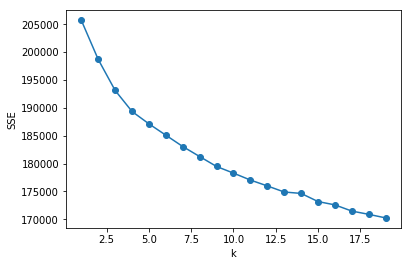

In [90]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 

'利用SSE选择k'
SSE = []  # 存放每次结果的误差平方和
for k in range(1,20):
    print('k={}'.format(k))
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(wordvector)
    SSE.append(estimator.inertia_) # estimator.inertia_获取聚类准则的总和
X = range(1,20)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

In [160]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from Bio.Cluster import kcluster
from Bio.Cluster import clustercentroids
import matplotlib.pyplot as plt




In [ ]:
%matplotlib inline
import numpy as np
data=wordvector
#这个函数的返回值为一个包含 (clusterid, error, nfound) 的元组，其中 clusterid 是 一个整型矩阵，为每行或列所在的类。
#error 是最优聚类解中，每类内距离的总和， nfound 指的是最优解出现的次数。
clusterid, error, nfound = kcluster(data, nclusters=50, dist='u',npass=3)


In [181]:
clusterid[2]

2

In [182]:
#把是一类的放入到一个集合

classCollects_cos={}
for i in range(len(clusterid)):
    if clusterid[i] in classCollects_cos.keys():
        classCollects_cos[clusterid[i]].append(keys[i])
    else:
        classCollects_cos[clusterid[i]]=[keys[i]]

In [184]:
classCollects_cos.keys()

dict_keys([0, 1, 2])

In [187]:
classCollects_cos[2]

['充分发挥',
 '强大',
 '十六号',
 '荣熙',
 '进料',
 '莱尔',
 '异常',
 '济南市',
 '畅购',
 '文化部',
 '建筑物',
 '周边游',
 '二十六条',
 '从代泊员',
 '升舱',
 '整整',
 '狂欢节',
 '获邀',
 '年版',
 '几大',
 '上市公司',
 '连',
 '惠在',
 '客户资源',
 '购物广场',
 '题解',
 '重逢',
 '支点',
 '鸭田稻',
 '经贸关系',
 '迎泽',
 '庄胜崇光百货',
 '课',
 '首发',
 '蓝熬',
 '布料',
 '期前',
 '巴宝莉',
 '记者',
 '圣贝为',
 '共限享',
 '养老保险',
 '刺激',
 '洲际',
 '收割机',
 '日利率',
 '加密',
 '专职',
 '音箱',
 '之物',
 '车充',
 '东急',
 '精华',
 '必经之路',
 '渝中区',
 '化解',
 '厂家',
 '商会',
 '简易',
 '关徽',
 '比惠',
 '工银融',
 '市政',
 '六福',
 '登高',
 '非物',
 '爱心',
 '单周仅',
 '你好',
 '油炸锅',
 '呈现',
 '动能',
 '需为',
 '中海',
 '招商',
 '披点',
 '九鼎',
 '所有权',
 '外资',
 '证正',
 '接机',
 '轻奢',
 '仲恺路',
 '系食',
 '蚊',
 '指标',
 '美高梅',
 '船',
 '之日',
 '个别',
 '食品城',
 '恶',
 '看见',
 '漫心',
 '同类',
 '奶等',
 '上品',
 '深惠',
 '孳生地',
 '日亚',
 '今天',
 '首尾',
 '含三芯',
 '凭券',
 '用卡自',
 '美艳',
 '复制',
 '报刊',
 '随身带',
 '工贸',
 '应标',
 '萝岗',
 '新建',
 '吴晓灵',
 '证券日报',
 '万里行',
 '旗下',
 '绝对',
 '然月',
 '新',
 '便捷性',
 '市',
 '光荣',
 '二七',
 '海洋',
 '出资',
 '怀',
 '制暖',
 '钟秀街',
 '挑拣',
 '板块',
 '餐馆',
 '汾店',
 '净水器',
 '河店',
 '金城',
 '宝

index=0
index=1
[3]
[0.09540644, 0.08026611]


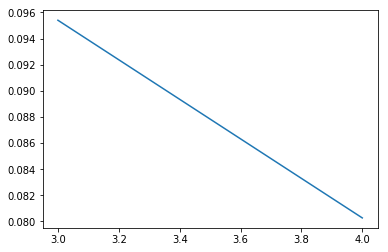

In [162]:
%matplotlib inline
import numpy as np
data=wordvector
coef = []
x=range(3,5)
for index, clusters in enumerate(x):
    print('index={}'.format(index))
    #这个函数的返回值为一个包含 (clusterid, error, nfound) 的元组，其中 clusterid 是 一个整型矩阵，为每行或列所在的类。
    #error 是最优聚类解中，每类内距离的总和， nfound 指的是最优解出现的次数。
    clusterid, error, nfound = kcluster(data, clusters, dist='u',npass=3)
    silhouette_avg = silhouette_score(data, clusterid, metric = 'cosine')
    coef.append(silhouette_avg)
  
e =[i+3 for i,j in enumerate(coef) if j == max(coef)]
print (e)
print (coef)
plt.plot(x,coef)


In [176]:
 nfound

1

In [178]:
len(clusterid)

18028